# Генерация заголовков научных статей: слабый baseline

В этом видео мы обсудим последнее задание в нашем курсе. Последнее задание (оно же самое и сложное) — это решение соревнования на kaggle. Если вы уже смотрели курс "Нейронные сети и компьютерное зрение", то вы знакомы с платформой kaggle и даже решали контест про классификацию грязных и чистых тарелок. В нашем курсе мы предлагаем вам решить соревнование связанное с обработкой текстов (конечно же), и оно будет заключаться в следующем. Мы предлагаем вам почувствовать себя исследователями, учёными, которые пишут свою научную статью, и научиться автоматически придумывать заголовки к научным статьям. В качестве входных данных мы предлагаем вам абстракты к научным статьям, и вам нужно будет, с помощью классических методов или с помощью нейронных сетей, придумать заголовки к этим статьям. Теперь — немного про платформу kaggle. Если вы уже знакомы с ней, то смело пропускайте этот шаг в уроке, если же нет — то я сделаю краткий обзор этой платформы. Платформа kaggle — это удобный инструмент для проведения и участия в соревнованиях по машинному обучению. Платформа предоставляет такие удобные инструменты, как leaderboard, то есть вы можете прислать своё решение и посмотреть, насколько вы оторвались вперёд или, наоборот, насколько ваш score просел относительно других участников (ваших конкурентов). Во-вторых, kaggle умеет автоматически считают score вашего submission, то есть всё, что вам нужно — это прислать CSV-файлик с вашим решением, а kaggle посчитает выбранную метрику за вас. Например, вы можете прислать файлик, состоящий из двух колонок — ID и некоторая предсказанная метка (например, вероятность или класс объекта) и kaggle, на основе этого CSV-файлика, сможет посчитать вам, например, precision или recall, или f-меру, либо какую-то другую метрику, которую организаторы соревнования выберут. Ещё одна отличительная особенность kaggle — это то, что данные достаточно часто делятся на 2 части: на public и private-часть. И, соответственно, во время проведения соревнования вы видите свой score на лидерборде только на public-части датасета. При этом, когда соревнование заканчивается, становится открытой private-часть лидерборда и вы уже можете видеть свой окончательный результат участия в соревновании. Такие методы помогают избежать списывания, некоторого читерства при участии в соревновании и, в целом, делают соревнование более интересными и конкурентными. И последняя вишенка на торте — самые успешные участники соревнования на kaggle будут приглашены на собеседование на стажировку в Samsung.

Представьте, что вы уже написали научную статью, и — вот никак не можете придумать к ней классное, звучное название. И тогда ваша нейронная сеть придёт вам на помощь. Конечно, мы не предлагаем вам решать такое сложное задание с нуля. Мы предоставляем вам бейслайн (baseline). На самом деле, на нашем лидерборте есть даже два бейслайна: мы их называем "слабым" и "сильным" бейслайном. Слабый бейслайн[1] — это seq2seq модель, где энкодером и декодером выступают две LSTM, также в этой модели есть attention. В качестве сильного бейслайна, мы использовали предобученную сеть, о которой мы говорили в прошлой (шестой) главе нашего курса, а именно — мы взяли предобученный BERT и, с его помощью, сгенерировали заголовки для наших научных статей. Чтобы вам было интересней участвовать в конкурсе, мы предоставляем вам код только для слабого бейслайна, а всякие пре-тренированные модели вам уже придётся кодить самостоятельно. Тем не менее, давайте коротко пробежимся по коду бейслайна и разберём, как же он работает. Но особенное внимание давайте уделим не именно коду бейслайна и тому, как работает и LSTM с attention (это вы уже знаете из прошлых глав курса). Самое главное — давайте посмотрим как быстро, с помощью скриптов, которые мы вам предоставляем, сгенерировать CSV-файлик в том формате, который будет принят kaggle. То есть, как сгенерировать submission таким образом, чтобы можно было его послать в kaggle и посмотреть на свой результат на лидерборде. Итак, начнём! В качестве основы для нашего бейслайна мы взяли туториал из github-репозитория (который вы можете найти вот по этой ссылке) под названием pytorch-seq2seq и мы немного видоизменили код этого бейслайна чтобы приспособить его для решения нашей задачи (тем не менее, первоисточник находится вот здесь, по ссылке). Давайте посмотрим на код. Ну, первым делом, всё как обычно — мы импортируем torch, torchtext, spacy — все нужные нам библиотеки. Задаём random seed и делаем spacy.load. Дальше (всё так же как обычно) мы создаём функцию tokenize, которая поможет нам разбить наши тексты на токены и загружаем наш датасет. Делаем мы это с помощью библиотеки torchtext, в папке "datasets" у нас уже лежит файл с обучающей выборкой — "train.csv". Точно такой же как, выложен у вас на платформе kaggle — вы можете его скачать. Загрузка такого датасета займёт довольно много времени, у меня она заняла примерно полторы минуты. Это достаточно большой файл, он состоит из 135 тысяч записей. Эти трейновые данные вы можете разделить на три кусочка (как обычно), на обучение, на валидацию и на данные для тестирования. Соответственно, дальше вы сможете померить качество своей модели (перед посылкой в kaggle) на тестовых данных — на тех, которые ваша модель не видела при обучении. Ну, давайте так и сделаем. Поделим наши данные в соотношении 98%/1%/1%. Дальше строим словарь для нашей модели. Уникальных токенов в нашем словаре около 40 000. И дальше мы определяем итераторы для того, чтобы итерироваться по нашим обучающим, валидационным и тестовым данным. В целом, этот код практически не отличается от того, что мы уже разбирали в главе про LSTM и про seq2seq модели.
[1] Генерация заголовков научных статей: слабый baseline
Свернуть


Источник: https://github.com/bentrevett/pytorch-seq2seq

In [1]:
# Если Вы запускаете ноутбук на colab,
# выполните следующие строчки, чтобы подгрузить библиотеку dlnlputils:

# !git clone https://github.com/Samsung-IT-Academy/stepik-dl-nlp.git
# import sys; sys.path.append('/content/stepik-dl-nlp')
# from google.colab import drive
# drive.mount('/content/drive')

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchtext.legacy.data import Field, BucketIterator

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import spacy

import random
import math
import time

In [5]:
SEED = 1234

random.seed(SEED)
torch.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

# возможно, Вам потребуется предварительно загрузить модели SpaCy для английского языка
!python -m spacy download en_core_web_sm

spacy_en = spacy.load('en_core_web_sm')

def tokenize(text):
    """
    Tokenizes English text from a string into a list of strings (tokens)
    """
    return [tok.text for tok in spacy_en.tokenizer(text) if not tok.text.isspace()]

     |████████████████████████████████| 13.9 MB 2.8 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
from torchtext.legacy import data, vocab

tokenizer = data.get_tokenizer('spacy')
TEXT = Field(tokenize=tokenize,
            init_token = '<sos>', 
            eos_token = '<eos>', 
            include_lengths = True,
            lower = True)

Разархивируйте файл train.csv

In [8]:
%%time
trn_data_fields = [("src", TEXT),
                   ("trg", TEXT)]

# dataset = data.TabularDataset(path='datasets/train.csv',format='csv',
#     skip_header=True,fields=trn_data_fields)

dataset = data.TabularDataset(
    path='train.csv',
    format='csv',
    skip_header=True,
    fields=trn_data_fields
)

train_data, valid_data, test_data = dataset.split(split_ratio=[0.98, 0.01, 0.01])

CPU times: user 27.4 s, sys: 400 ms, total: 27.8 s
Wall time: 27.8 s


In [9]:
TEXT.build_vocab(train_data, min_freq = 7)
print(f"Unique tokens in vocabulary: {len(TEXT.vocab)}")

Unique tokens in vocabulary: 40353


In [10]:
BATCH_SIZE = 32

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

train_iterator, valid_iterator, test_iterator = BucketIterator.splits(
    (train_data, valid_data, test_data), 
     batch_size = BATCH_SIZE,
     sort_within_batch = True,
     sort_key = lambda x : len(x.src),
     device = device)

Теперь мы создаём класс "encoder". Что у него внутри? Давайте будем использовать LSTM модули. В принципе, можно использовать GRU-юниты, но качество особенно сильно от этого не поменяется. Здесь, в виде комментариев к коду, прописаны размерности всех векторов, с которыми нам нужно работать, поэтому, если вдруг вы захотите видоизменить бейслайн — вам будет гораздо проще отдебагать свой код и, в случае ошибки, понять, где она спряталась. Также пишем модуль attention. Мы будем использовать самый обыкновенный attention и посмотрим, насколько он нам помогает, насколько наша модель начинает работать лучше при его появлении в нашем пайплайне (pipeline). Кроме того, attention позволит нам посмотреть на красивые визуализации, то есть посмотреть, какие слова из абстракта связаны с какими словами из сгенерированного заголовка. Также пишем класс "decoder" — здесь мы (точно так же) используем LSTM-модули, используем dropout... В целом, предлагаю не останавливаться подробно на этом коде, поскольку мы его уже разбирали в одном из семинаров из модуля про seq2seq модели. Дальше вы задаёте свою модель — определяете энкодер, декодер и attention модуль, задаёте, сколько дропаута вам нужно, какие будут размерности скрытого слоя и размеры эмбеддинг слоёв. Тут важно понимать то, что если в вашей модели будет очень много параметров, скорее всего, она переобучится и ничего хорошего из этого не выйдет. Поэтому нужно балансировать между слишком маленькой размерностью вектора, которая не позволит закодировать достаточное количество информации, и слишком большой размерностью вектора, из-за чего модель может переобучиться. В нашем случае оказалось, что в модели примерно 24 миллиона параметров. Поскольку данных у нас много, будем надеяться, что наша модель не переобучится. Кроме того, мы использовали достаточно много дропаута.


In [11]:
class Encoder(nn.Module):
    def __init__(self, input_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout):
        super().__init__()
        
        self.embedding = nn.Embedding(input_dim, emb_dim)
        
        self.rnn = nn.GRU(emb_dim, enc_hid_dim, bidirectional = True)
        
        self.fc = nn.Linear(enc_hid_dim * 2, dec_hid_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, src, src_len):
        
        #src = [src sent len, batch size]
        #src_len = [src sent len]
        
        embedded = self.dropout(self.embedding(src))
        
        #embedded = [src sent len, batch size, emb dim]
                
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, src_len)
                
        packed_outputs, hidden = self.rnn(packed_embedded)
                                 
        #packed_outputs is a packed sequence containing all hidden states
        #hidden is now from the final non-padded element in the batch
            
        outputs, _ = nn.utils.rnn.pad_packed_sequence(packed_outputs) 
            
        #outputs is now a non-packed sequence, all hidden states obtained
        #  when the input is a pad token are all zeros
            
        #outputs = [sent len, batch size, hid dim * num directions]
        #hidden = [n layers * num directions, batch size, hid dim]
        
        #hidden is stacked [forward_1, backward_1, forward_2, backward_2, ...]
        #outputs are always from the last layer
        
        #hidden [-2, :, : ] is the last of the forwards RNN 
        #hidden [-1, :, : ] is the last of the backwards RNN
        
        #initial decoder hidden is final hidden state of the forwards and backwards 
        #  encoder RNNs fed through a linear layer
        hidden = torch.tanh(self.fc(torch.cat((hidden[-2,:,:], hidden[-1,:,:]), dim = 1)))
        
        #outputs = [sent len, batch size, enc hid dim * 2]
        #hidden = [batch size, dec hid dim]
        
        return outputs, hidden

class Attention(nn.Module):
    def __init__(self, enc_hid_dim, dec_hid_dim):
        super().__init__()
        
        self.attn = nn.Linear((enc_hid_dim * 2) + dec_hid_dim, dec_hid_dim)
        self.v = nn.Parameter(torch.rand(dec_hid_dim))
        
    def forward(self, hidden, encoder_outputs, mask):
        
        #hidden = [batch size, dec hid dim]
        #encoder_outputs = [src sent len, batch size, enc hid dim * 2]
        #mask = [batch size, src sent len]
        
        batch_size = encoder_outputs.shape[1]
        src_len = encoder_outputs.shape[0]
        
        #repeat encoder hidden state src_len times
        hidden = hidden.unsqueeze(1).repeat(1, src_len, 1)
        
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        #hidden = [batch size, src sent len, dec hid dim]
        #encoder_outputs = [batch size, src sent len, enc hid dim * 2]
        
        energy = torch.tanh(self.attn(torch.cat((hidden, encoder_outputs), dim = 2))) 
        
        #energy = [batch size, src sent len, dec hid dim]
                
        energy = energy.permute(0, 2, 1)
        
        #energy = [batch size, dec hid dim, src sent len]
        
        #v = [dec hid dim]
        
        v = self.v.repeat(batch_size, 1).unsqueeze(1)
        
        #v = [batch size, 1, dec hid dim]
            
        attention = torch.bmm(v, energy).squeeze(1)
        
        #attention = [batch size, src sent len]
        
        attention = attention.masked_fill(mask == 0, -1e10)
        
        return F.softmax(attention, dim = 1)

class Decoder(nn.Module):
    def __init__(self, output_dim, emb_dim, enc_hid_dim, dec_hid_dim, dropout, attention):
        super().__init__()

        self.output_dim = output_dim
        self.attention = attention
        
        self.embedding = nn.Embedding(output_dim, emb_dim)
        
        self.rnn = nn.GRU((enc_hid_dim * 2) + emb_dim, dec_hid_dim)
        
        self.out = nn.Linear((enc_hid_dim * 2) + dec_hid_dim + emb_dim, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, input, hidden, encoder_outputs, mask):
             
        #input = [batch size]
        #hidden = [batch size, dec hid dim]
        #encoder_outputs = [src sent len, batch size, enc hid dim * 2]
        #mask = [batch size, src sent len]
        
        input = input.unsqueeze(0)
        
        #input = [1, batch size]
        
        embedded = self.dropout(self.embedding(input))
        
        #embedded = [1, batch size, emb dim]
        
        a = self.attention(hidden, encoder_outputs, mask)
                
        #a = [batch size, src sent len]
        
        a = a.unsqueeze(1)
        
        #a = [batch size, 1, src sent len]
        
        encoder_outputs = encoder_outputs.permute(1, 0, 2)
        
        #encoder_outputs = [batch size, src sent len, enc hid dim * 2]
        
        weighted = torch.bmm(a, encoder_outputs)
        
        #weighted = [batch size, 1, enc hid dim * 2]
        
        weighted = weighted.permute(1, 0, 2)
        
        #weighted = [1, batch size, enc hid dim * 2]
        
        rnn_input = torch.cat((embedded, weighted), dim = 2)
        
        #rnn_input = [1, batch size, (enc hid dim * 2) + emb dim]
            
        output, hidden = self.rnn(rnn_input, hidden.unsqueeze(0))
        
        #output = [sent len, batch size, dec hid dim * n directions]
        #hidden = [n layers * n directions, batch size, dec hid dim]
        
        #sent len, n layers and n directions will always be 1 in this decoder, therefore:
        #output = [1, batch size, dec hid dim]
        #hidden = [1, batch size, dec hid dim]
        #this also means that output == hidden
        assert (output == hidden).all()
        
        embedded = embedded.squeeze(0)
        output = output.squeeze(0)
        weighted = weighted.squeeze(0)
        
        output = self.out(torch.cat((output, weighted, embedded), dim = 1))
        
        #output = [bsz, output dim]
        
        return output, hidden.squeeze(0), a.squeeze(1)

class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder, pad_idx, sos_idx, eos_idx, device):
        super().__init__()
        
        self.encoder = encoder
        self.decoder = decoder
        self.pad_idx = pad_idx
        self.sos_idx = sos_idx
        self.eos_idx = eos_idx
        self.device = device
        
    def create_mask(self, src):
        mask = (src != self.pad_idx).permute(1, 0)
        return mask
        
    def forward(self, src, src_len, trg, teacher_forcing_ratio = 0.5):
        
        #src = [src sent len, batch size]
        #src_len = [batch size]
        #trg = [trg sent len, batch size]
        #teacher_forcing_ratio is probability to use teacher forcing
        #e.g. if teacher_forcing_ratio is 0.75 we use teacher forcing 75% of the time
        
        if trg is None:
            assert teacher_forcing_ratio == 0, "Must be zero during inference"
            inference = True
            trg = torch.zeros((100, src.shape[1])).long().fill_(self.sos_idx).to(src.device)
        else:
            inference = False
            
        batch_size = src.shape[1]
        max_len = trg.shape[0]
        trg_vocab_size = self.decoder.output_dim
        
        #tensor to store decoder outputs
        outputs = torch.zeros(max_len, batch_size, trg_vocab_size).to(self.device)
        
        #tensor to store attention
        attentions = torch.zeros(max_len, batch_size, src.shape[0]).to(self.device)
        
        #encoder_outputs is all hidden states of the input sequence, back and forwards
        #hidden is the final forward and backward hidden states, passed through a linear layer
        encoder_outputs, hidden = self.encoder(src, src_len)
                
        #first input to the decoder is the <sos> tokens
        input = trg[0,:]
        
        mask = self.create_mask(src)
                
        #mask = [batch size, src sent len]
                
        for t in range(1, max_len):
            
            #insert input token embedding, previous hidden state, all encoder hidden states 
            # and mask
            #receive output tensor (predictions), new hidden state and attention tensor
            output, hidden, attention = self.decoder(input, hidden, encoder_outputs, mask)
            
            #place predictions in a tensor holding predictions for each token
            outputs[t] = output
            
            #place attentions in a tensor holding attention value for each input token
            attentions[t] = attention
            
            #decide if we are going to use teacher forcing or not
            teacher_force = random.random() < teacher_forcing_ratio
            
            #get the highest predicted token from our predictions
            top1 = output.argmax(1) 
            
            #if teacher forcing, use actual next token as next input
            #if not, use predicted token
            input = trg[t] if teacher_force else top1
            
            #if doing inference and next token/prediction is an eos token then stop
            if inference and input.item() == self.eos_idx:
                return outputs[:t], attentions[:t]
            
        return outputs, attentions

In [12]:
INPUT_DIM = len(TEXT.vocab)
OUTPUT_DIM = len(TEXT.vocab)
ENC_EMB_DIM = 128
DEC_EMB_DIM = 128
ENC_HID_DIM = 64
DEC_HID_DIM = 64
ENC_DROPOUT = 0.8
DEC_DROPOUT = 0.8
PAD_IDX = TEXT.vocab.stoi['<pad>']
SOS_IDX = TEXT.vocab.stoi['<sos>']
EOS_IDX = TEXT.vocab.stoi['<eos>']

attn = Attention(ENC_HID_DIM, DEC_HID_DIM)
enc = Encoder(INPUT_DIM, ENC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, ENC_DROPOUT)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, ENC_HID_DIM, DEC_HID_DIM, DEC_DROPOUT, attn)

model = Seq2Seq(enc, dec, PAD_IDX, SOS_IDX, EOS_IDX, device).to(device)

In [13]:
def init_weights(m):
    for name, param in m.named_parameters():
        if 'weight' in name:
            nn.init.normal_(param.data, mean=0, std=0.01)
        else:
            nn.init.constant_(param.data, 0)
            
model.apply(init_weights)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)

The model has 23,440,673 trainable parameters


### Обучение модели

Сейчас мы можем начать тренировать нашу модель и посмотреть, что из этого выйдет. Но, как вы понимаете, это займёт очень много времени. Например, 30 эпох этой модели я обучала примерно сутки (наверное, даже чуть меньше — поставила вечером, а утром она была уже готова). Поэтому давайте просто загрузим готовые веса нашей модели и посмотрим, как она будет генерировать нам заголовки. Нам нужно написать функцию, которая называется "translate_sentence". Собственно, что здесь происходит, основное? Мы вызываем нашу модель, передаём ей тензор с абстрактом и просим сгенерировать заголовок. На выход мы получаем наш сгенерированный заголовок и карту attention, то есть — ту красивую визуализацию, о которой мы говорили чуть раньше в этом видео. И также, пишем функцию, которая называется "display_attention". Здесь мы сможем, как раз, нарисовать некоторую матрицу, которая покажет нам взаимосвязи между словами из абстракта и из заголовка.

In [18]:
import matplotlib
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import clear_output


def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    
    model.train()
    
    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):
        
        src, src_len = batch.src
        trg, trg_len = batch.trg
        
        optimizer.zero_grad()
        
        output, attetion = model(src, src_len.to('cpu'), trg)
        
        #trg = [trg sent len, batch size]
        #output = [trg sent len, batch size, output dim]
        
        output = output[1:].view(-1, output.shape[-1])
        trg = trg[1:].view(-1)
        
        #trg = [(trg sent len - 1) * batch size]
        #output = [(trg sent len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
        
        loss.backward()
        
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        
        epoch_loss += loss.item()
        
        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()
        
    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    
    model.eval()
    
    epoch_loss = 0
    
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src, src_len = batch.src
            trg, trg_len = batch.trg

            output, attention = model(src, src_len.to('cpu'), trg, 0) #turn off teacher forcing

            #trg = [trg sent len, batch size]
            #output = [trg sent len, batch size, output dim]

            output = output[1:].view(-1, output.shape[-1])
            trg = trg[1:].view(-1)

            #trg = [(trg sent len - 1) * batch size]
            #output = [(trg sent len - 1) * batch size, output dim]

            loss = criterion(output, trg)

            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

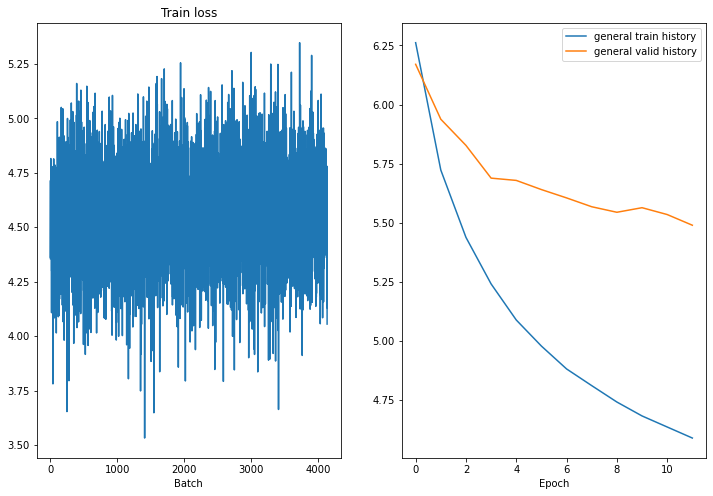

Epoch: 13 | Time: 7m 54s
	Train Loss: 4.557 | Train PPL:  95.328
	 Val. Loss: 5.525 |  Val. PPL: 250.999


In [19]:
# MODEL_NAME = 'models/lstm_baseline.pt'
MODEL_NAME = 'baseline2.pt'
N_EPOCHS = 13
CLIP = 1

train_history = []
valid_history = []

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, train_iterator, optimizer, criterion, CLIP, train_history, valid_history)
    valid_loss = evaluate(model, valid_iterator, criterion)
    
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), MODEL_NAME)
        
        
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

Finally, we load the parameters from our best validation loss and get our results on the test set.

In [22]:
# for cpu usage
model.load_state_dict(torch.load(MODEL_NAME, map_location=torch.device('cpu')))

# for gpu usage
# model.load_state_dict(torch.load(MODEL_NAME), map_location=torch.device('cpu'))


test_loss = evaluate(model, test_iterator, criterion)

print(f'| Test Loss: {test_loss:.3f} | Test PPL: {math.exp(test_loss):7.3f} |')

| Test Loss: 5.528 | Test PPL: 251.583 |


### Генерация заголовков

А теперь давайте посмотрим на то, насколько хорошо наша LSTM научилась, насколько всё-таки наш слабый бейслайн[1] оказался слабым... или сильным. Если мы возьмём пример из обучающей выборки — наверняка, получится что-то хорошее. Но всё-таки давайте проверим. Итак, берём некоторый произвольный индекс — пусть, это будет "100". Смотрим на абстракт. Какая-то статья про байесовские методы. Отлично. И смотрим на предсказанный заголовок. Заголовок содержит слово "байесовский", "non-parametric", "clustering". И, в общем-то, ключевые слова из этого заголовка отражают суть из абстракта. Если мы посмотрим на карту attention, то увидим, что слово "байесовский" коррелирует со словом "байесовский" из заголовка, слово "non-parametric" из абстракта коррелирует, опять же, со словом "non-parametric" из заголовка и со словом "байесовский" из заголовка. Ну, и так — дальше. Например, слово "multi-level" коррелирует с достаточно большим количеством слов из заголовка. Теперь давайте чуть усложним задачу и посмотрим, как будет наша модель работать на тестовых данных. Берём произвольный индекс из тестового датасета. Смотрим на абстракт — ну, отлично, много математических символов, много формул. Давайте не будем в него подробно вчитываться. И заголовок, который предсказала наша сеть звучит так: "multifractal scaling of the multifractal"... Заголовок выглядит, в принципе, достаточно осмысленно, но — например, два раза повторяется слово "мультифрактальный", что не очень коррелирует со здравым смыслом. И, кроме того, тире стоит в конце предложения. То есть сеть действительно является достаточно... "бейслайном" и работает... не то, чтобы идеально. При этом, карта attention, в принципе даёт нам какие-то интересные взаимосвязи. Например, она поняла, что слово мультифрактальный достаточно важно в этом абстракте и оно связано практически со всеми словами из заголовка. Слово "disordered" тоже достаточно важно в нём... Но остальные слова как-то особо не выделяются. Слово bi-dimensional также имеет некоторую взаимосвязь со словами из заголовка. Пока мы посмотрели только на один заголовок — вдруг, это был какой-то "cherry pick" и мы показали вам самые лучшие примеры из всей нашей выборки в этом видео... Давайте посмотрим на большее количество заголовков. Ну, например, оригинальный заголовок был "A Process Calculus for Spatially-explicit Ecological Models". Наша модель предсказала: "A temporal population process role of ecology". В принципе, неплохо какой-то смысл модель смогла поймать. Второй пример не настолько хорош — например, модель два раза повторила слово dynamic. Но, тем не менее, какие-то ключевые слова она схватить смогла. Есть довольно странные примеры. Например, вот этот — где модель запуталась и начала повторять слова "fruit" и "flies" много-много-много раз, хотя эти слова действительно важны в нашем абстракте и они встречаются в оригинальном заголовке. В целом, если посмотреть на другие примеры, встречаются совсем неудачные варианты (например, вот такие, где модель предсказала просто много "unknown"-меток и не смогла справиться с переводом), но, насколько я вижу, здесь проблема была в том, что заголовок написан на французском языке. А такое мы не учитывали, когда учили нашу модель — мы её учили только на английском словаре и на английских данных. Соответственно, с французским языком модель застопорилась и не смогла предсказать ничего. Вполне ожидаемо. Тем не менее, мы видим много достаточно хороших примеров.
[1] Генерация заголовков научных статей: слабый baseline

In [26]:
def translate_sentence(model, tokenized_sentence):
    model.eval()
    tokenized_sentence = ['<sos>'] + [t.lower() for t in tokenized_sentence] + ['<eos>']
    numericalized = [TEXT.vocab.stoi[t] for t in tokenized_sentence] 
    sentence_length = torch.LongTensor([len(numericalized)]).to(device) 
    tensor = torch.LongTensor(numericalized).unsqueeze(1).to(device) 
    translation_tensor_logits, attention = model(tensor, sentence_length.to('cpu'), None, 0) 
    translation_tensor = torch.argmax(translation_tensor_logits.squeeze(1), 1)
    translation = [TEXT.vocab.itos[t] for t in translation_tensor]
    translation, attention = translation[1:], attention[1:]
    return translation, attention
    
def display_attention(sentence, translation, attention):
    
    fig = plt.figure(figsize=(30,50))
    ax = fig.add_subplot(111)
    
    attention = attention.squeeze(1).cpu().detach().numpy().T
    
    cax = ax.matshow(attention, cmap='bone')
   
    ax.tick_params(labelsize=12)
    ax.set_yticklabels(['']+['<sos>']+[t.lower() for t in sentence]+['<eos>'])
    ax.set_xticklabels(['']+translation, rotation=80)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()
    plt.close()

In [27]:
example_idx = 100

src = vars(train_data.examples[example_idx])['src']
trg = vars(train_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['the', 'integrated', 'completed', 'likelihood', '(', 'icl', ')', 'criterion', 'has', 'proven', 'to', 'be', 'a', 'very', 'popular', 'approach', 'in', 'model', '-', 'based', 'clustering', 'through', 'automatically', 'choosing', 'the', 'number', 'of', 'clusters', 'in', 'a', 'mixture', 'model', '.', 'this', 'approach', 'effectively', 'maximises', 'the', 'complete', 'data', 'likelihood', ',', 'thereby', 'including', 'the', 'allocation', 'of', 'observations', 'to', 'clusters', 'in', 'the', 'model', 'selection', 'criterion', '.', 'however', 'for', 'practical', 'implementation', 'one', 'needs', 'to', 'introduce', 'an', 'approximation', 'in', 'order', 'to', 'estimate', 'the', 'icl', '.', 'our', 'contribution', 'here', 'is', 'to', 'illustrate', 'that', 'through', 'the', 'use', 'of', 'conjugate', 'priors', 'one', 'can', 'derive', 'an', 'exact', 'expression', 'for', 'icl', 'and', 'so', 'avoiding', 'any', 'approximation', '.', 'moreover', ',', 'we', 'illustrate', 'how', 'one', 'can', 'find',

In [28]:
translation, attention = translate_sentence(model, src)

print(f'predicted trg = {translation}')

predicted trg = ['a', 'likelihood', 'likelihood', 'likelihood', 'estimation', 'in', 'a', 'likelihood']


/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


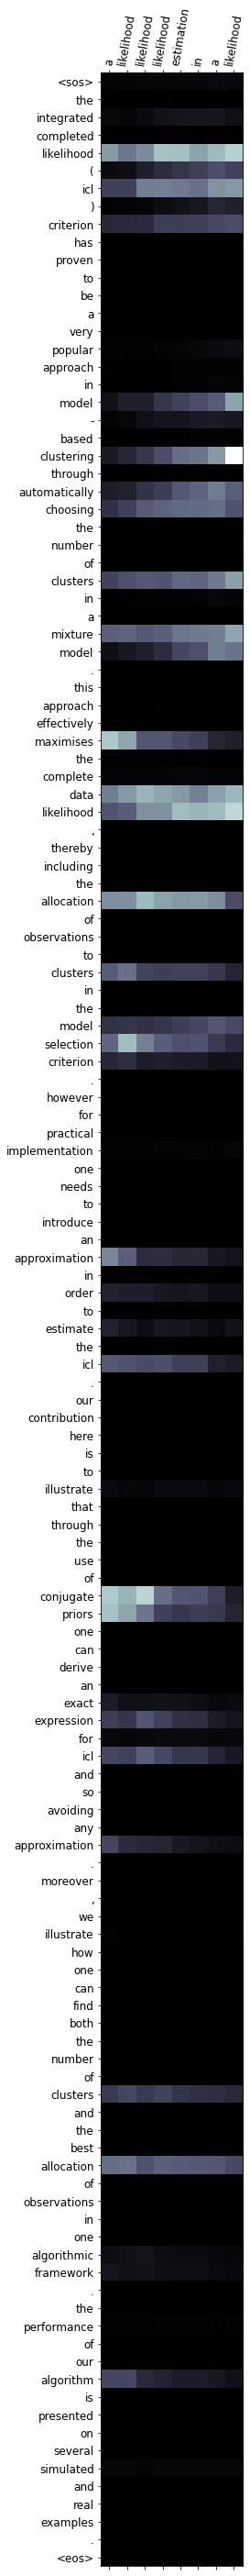

In [29]:
display_attention(src, translation, attention)

In [30]:
for example_idx in range(100):
    src = vars(test_data.examples[example_idx])['src']
    trg = vars(test_data.examples[example_idx])['trg']
    translation, attention = translate_sentence(model, src)

    print('Оригинальный заголовок: ', ' '.join(trg))
    print('Предсказанный заголовок: ', ' '.join(translation))
    print('-----------------------------------')

Оригинальный заголовок:  diversity and its decomposition into variety , balance and disparity
Предсказанный заголовок:  diversity diversity of diversity diversity
-----------------------------------
Оригинальный заголовок:  improving the johnson - lindenstrauss lemma
Предсказанный заголовок:  on the distance - means of the distance
-----------------------------------
Оригинальный заголовок:  the mean - field approximation model of company 's income growth
Предсказанный заголовок:  a the - of the income distribution
-----------------------------------
Оригинальный заголовок:  efficient inference of protein structural ensembles
Предсказанный заголовок:  protein - of protein folding
-----------------------------------
Оригинальный заголовок:  financial black swans driven by ultrafast machine ecology
Предсказанный заголовок:  the - of financial dynamics
-----------------------------------
Оригинальный заголовок:  tracking dynamic point processes on networks
Предсказанный заголовок:  dynami

In [31]:
example_idx = 0

src = vars(valid_data.examples[example_idx])['src']
trg = vars(valid_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['suppose', 'a', 'string', '$', 'x_1^n=(x_1,x_2,', '...', ',x_n)$', 'generated', 'by', 'a', 'memoryless', 'source', '$', '(', 'x_n)_{n\\geq', '1}$', 'with', 'distribution', '$', 'p$', 'is', 'to', 'be', 'compressed', 'with', 'distortion', 'no', 'greater', 'than', '$', 'd\\geq', '0', '$', ',', 'using', 'a', 'memoryless', 'random', 'codebook', 'with', 'distribution', '$', 'q$.', 'the', 'compression', 'performance', 'is', 'determined', 'by', 'the', '`', '`', 'generalized', 'asymptotic', 'equipartition', 'property', "''", '(', 'aep', ')', ',', 'which', 'states', 'that', 'the', 'probability', 'of', 'finding', 'a', '$', 'd$-close', 'match', 'between', '$', 'x_1^n$', 'and', 'any', 'given', 'codeword', '$', 'y_1^n$', ',', 'is', 'approximately', '$', '2^{-n', 'r(p', ',', 'q', ',', 'd)}$', ',', 'where', 'the', 'rate', 'function', '$', 'r(p', ',', 'q', ',', 'd)$', 'can', 'be', 'expressed', 'as', 'an', 'infimum', 'of', 'relative', 'entropies', '.', 'the', 'main', 'purpose', 'here', 'is', 'to'

predicted trg = ['on', 'the', 'of', 'of', 'the', 'of', 'of', 'the']


/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


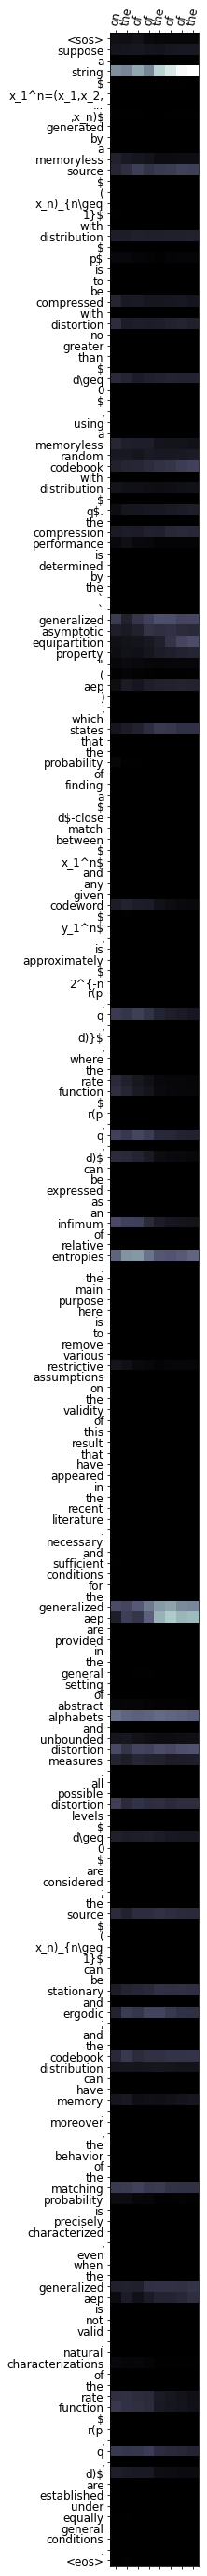

In [33]:
translation, attention = translate_sentence(model, src)

print(f'predicted trg = {translation}')

display_attention(src, translation, attention)

In [34]:
example_idx = 510

src = vars(test_data.examples[example_idx])['src']
trg = vars(test_data.examples[example_idx])['trg']

print(f'src = {src}')
print(f'trg = {trg}')

src = ['we', 'present', 'a', 'bayesian', 'hierarchical', 'framework', 'for', 'both', 'cross', '-', 'sectional', 'and', 'time', '-', 'series', 'return', 'prediction', '.', 'our', 'approach', 'builds', 'on', 'a', 'market', '-', 'timing', 'predictive', 'system', 'that', 'jointly', 'allows', 'for', 'time', '-', 'varying', 'coefficients', 'driven', 'by', 'fundamental', 'characteristics', '.', 'with', 'a', 'bayesian', 'formulation', 'for', 'ensemble', 'learning', ',', 'we', 'examine', 'the', 'joint', 'predictability', 'as', 'well', 'as', 'portfolio', 'efficiency', 'via', 'predictive', 'distribution', '.', 'in', 'the', 'empirical', 'analysis', 'of', 'asset', '-', 'sector', 'allocation', ',', 'our', 'hierarchical', 'ensemble', 'learning', 'portfolio', 'achieves', '500', '%', 'cumulative', 'returns', 'in', 'the', 'period', '1998', '-', '2017', ',', 'and', 'outperforms', 'most', 'workhorse', 'benchmarks', 'as', 'well', 'as', 'the', 'passive', 'investing', 'index', '.', 'our', 'bayesian', 'infere

predicted trg = ['bayesian', 'bayesian', 'learning', 'for', 'portfolio', '-']


/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator


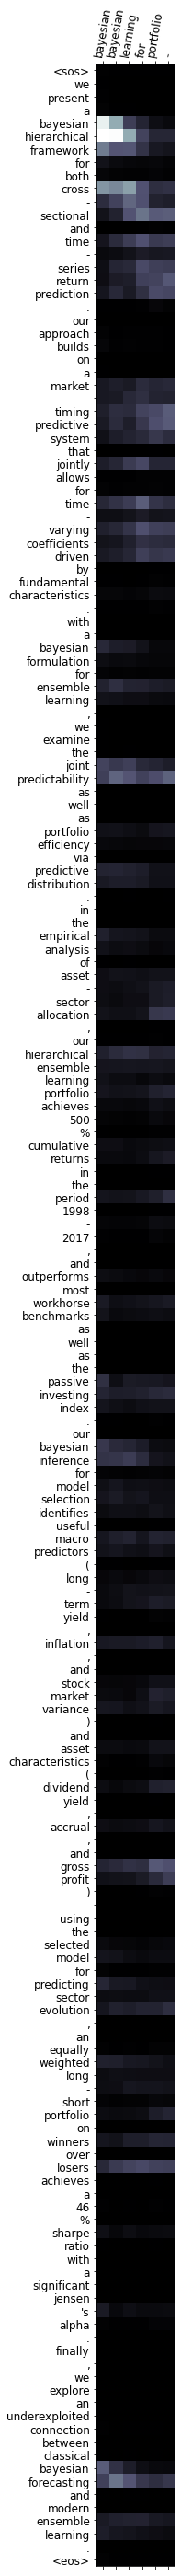

In [35]:
translation, attention = translate_sentence(model, src)

print(f'predicted trg = {translation}')

display_attention(src, translation, attention)

### Считаем BLEU на train.csv

Теперь всё-таки давайте посчитаем численно, насколько наш результат хорош. Как вы помните, для машинного перевода (да, и для задачи суммаризации тоже) можно применять метрику BLEU. Под капотом у метрики BLEU стоит простой подсчёт со-встречаемости N-грамм с различным N в оригинальном заголовке и в сгенерированном заголовке. То есть — что мы, по факту, будем делать? Сначала мы посчитаем пересечение слов в нашем оригинальном заголовке и в предсказанном, посчитаем точность этого предсказания (ну, например, если 3 слова из 6 из сгенерированного заголовка встречались в оригинальном заголовке, мы скажем, что precision по подсчёту униграмм равен 0.5). Дальше проделаем то же самое для биграмм, триграмм, 4-грамм, возможно увеличивать N дальше, можно сделать N меньше... Мы же остановимся на варианте, когда мы посчитаем всего 1-, 2- и 3-граммы. Мы перемножим полученное значение precision для различных униграмм, потом, как вы помните из формулы, нужно будет взять кубический корень из всего этого дела (потому, что мы использовали N-граммы трёх различных видов) и всё это дело нужно ещё умножить на "brevity penalty", то есть на штраф за длину предложения. Давайте же посчитаем, чему будет равен BLEU. Как вы понимаете, нулевой BLEU будет означать полный провал, a BLEU, равный единице, будет означать идеальную суммаризацию — точно такую же, как она была в оригинальных заголовках. Для того, чтобы посчитать BLEU, мы не будем писать формулы руками, а воспользуемся формулой из библиотеки NLTK. Импортируем библиотеку NLTK, также проставим, с какими весами мы хотим учитывать наши N-граммы (пускай униграммы учитываются с чуть-чуть большим весом, чем биграммы и триграммы). В целом, это не столь принципиально. И дальше мы считаем BLEU_score по нашим предсказанным сгенерированным заголовкам. И, в итоге получаем, что macro average bleu равен примерно 30% (если быть точнее, 29%). В целом, это достаточно неплохо для такого простого бейслайна, который периодически предсказывал полную бессмыслицу. Тем не менее, в соревновании на kaggle мы будем считать более простую метрику — не BLEU, а просто f-меру по встречаемости 1-, 2- и 3-грамм в оригинальном заголовке и в сгенерированном заголовке. Эта метрика чуть более простая и можно чуть проще отследить корреляцию того, что вы делали со своим решением, и того, какая метрика показалась на лидерборде. Кажется, что эту метрику анализировать будет чуть-чуть проще, чем сложный замороченный BLEU. Тем не менее, советуем вам перед посылкой в kaggle просчитывать и f-меру, а также precision/recall по отдельности, и BLEU, чтобы оценить, насколько ваша модель стала лучше или хуже по набору метрик, а не только по одной метрике.

In [36]:
import nltk

n_gram_weights = [0.3334, 0.3333, 0.3333]
test_len = len(test_data)

In [37]:
original_texts = []
generated_texts = []
macro_bleu = 0

for example_idx in range(test_len):
    src = vars(test_data.examples[example_idx])['src']
    trg = vars(test_data.examples[example_idx])['trg']
    translation, _ = translate_sentence(model, src)

    original_texts.append(trg)
    generated_texts.append(translation)

    bleu_score = nltk.translate.bleu_score.sentence_bleu(
        [trg],
        translation,
        weights = n_gram_weights
    )    
    macro_bleu += bleu_score

macro_bleu /= test_len

# averaging sentence-level BLEU (i.e. macro-average precision)
print('Macro-average BLEU (LSTM): {0:.5f}'.format(macro_bleu))

/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)
/home/dmitry/anaconda3/envs/stpk_nlp/lib/python3.7/site-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 3-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


Macro-average BLEU (LSTM): 0.27702


### Делаем submission в Kaggle

Отлично, с метрикой разобрались, теперь нужно понять, как сгенерировать submission в kaggle в том формате, в котором требуется. Пока что мы поняли только как генерировать целые предложения (заголовки). Теперь их нужно закодировать в тот вид, в котором проверяющая система на kaggle сможет всё это дело оценить. Отлично. Теперь давайте загрузим файл с тестовой выборкой "test.csv". Вы можете выкачать его из формы на kaggle (из вкладки "data"). Загружаем его, и давайте для каждого абстракта из тестовых данных сгенерируем заголовок — пока просто в виде текста. Для того, чтобы упростить вам работу и не заставлять вас разбираться с форматом файла, который нужно засылать в kaggle, мы написали скрипт, который называется "create_submission.py", и в нём есть функция под названием "generate_csv". В неё вам нужно подать два параметра. Первый параметр — это путь до файла, который выглядит следующим образом: это обычный CSV-файл, у которого две колонки. Первая колонка называется "abstract", вторая колонка — "title". Соответственно, abstract — это те же самые абстракты, которые вы видите в файле "test.csv", а это — ваши сгенерированные заголовки, то есть, просто обычная строка, предложение без какого-либо деления на токены (или чего-то ещё). Второй параметр этого скрипта — это путь до файла, куда вы хотите сложить результирующий submission. То есть место на вашем ноутбуке, куда вы хотите сохранить файл, который вы будете дальше засылать в kaggle. Кажется, очень просто. Всё, что вам нужно — это теперь сохранить абстракты и соответствующие им тайтлы (titles) в CSV-файл и дальше из "create_submission" вызвать функцию "generate_csv" и передать ей пути до двух файлов. Первый — это только что сгенерированный файлик из двух колонок, второй — место, куда вы хотите сохранить ваш файлик с предсказанием. Если мы посмотрим на то, что получается, то формат файла следующий. Вы можете обнаружить, что здесь есть какие-то не очень понятно читаемые индексы просто — от нуля и до некоторого N. Я немного поясню, что это такое. Мы скрыли от вас некоторые достаточно простые детали реализации, и под этим ID кроется очень простая схема. Мы не стали делить наш ID на две сущности — ID документа и ID биграммы, встречной в нём, а решили агрегировать это все в одну "вещь" — один ID. Вы можете отследить, что первые, например, 
m
1
m 
1
​	
  ID относятся к первому файлу, следующие 
m
2
m 
2
​	
  относится ко второму файлу — ко второму абстракту, и так далее. В целом, вам не нужно разбираться и делить ваши ID на принадлежность к тому или иному абстракту, чтобы заслать ваш submission в kaggle. Вам достаточно просто сгенерировать тайтлы для абстрактов из test.csv и запустить функцию "generate_csv" из нашего предложенного скрипта. Теперь, когда у вас есть такой файл, вы можете послать его в kaggle и посмотреть, какой score наберёт ваш submission. Если вы всё сделали правильно, то вы получите score около 24% (здесь я говорю не про BLEU, а про f-меру — ту метрику, которая считается на kaggle). Кроме того, вы заметите, что кроме этого бейслайна (слабого бейслайна) на лидерборде выставлен второй бейслайн. Как я уже говорила, он соответствует предобученному BERT и вы можете попробовать изобрести что-то ещё для того, чтобы побить не только слабый бейслайн[1], но и сильный, сложный бейслайн. Удачи вам при решении kaggle! Ждём ваши решения и ждём вас на собеседования и на стажировки!
[1] Генерация заголовков научных статей: слабый baseline
Свернуть


In [39]:
import pandas as pd

submission_data = pd.read_csv('test.csv')
abstracts = submission_data['abstract'].values

Генерация заголовков для тестовых данных:

In [40]:
titles = []
for abstract in abstracts:
    title, _ = translate_sentence(model, abstract.split())
    titles.append(' '.join(title).replace('<unk>', ''))

Записываем полученные заголовки в файл формата `<abstract>,<title>`:

In [41]:
submission_df = pd.DataFrame({'abstract': abstracts, 'title': titles})
submission_df.to_csv('predicted_titles.csv', index=False)

С помощью скрипта `generate_csv` приводим файл `submission_prediction.csv` в формат, необходимый для посылки в соревнование на Kaggle:

In [ ]:
# from create_submission import generate_csv

# generate_csv('datasets/predicted_titles.csv', 'datasets/kaggle_pred.csv', 'datasets/vocs.pkl')

In [ ]:
# !wc -l datasets/kaggle_pred.csv

In [ ]:
# !head datasets/kaggle_pred.csv